In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import datetime as dt
import pickle
import os

In [2]:
data = pd.read_csv('../Final-Data/rainfall.csv',index_col="Date")
data.head()

,POCRTC Pandharpur Solapur,KRS Panvel Raigad,"PINPALGAON, AHMEDNAGAR",SRS Basmat Nagar Higoli,Swantra pul vasahat Atpadi Sangli,RRSSC,"CoA,Barsi bypass road,Osmanabad",CA Dhule,ARS Nagpur road Amravathi,WDPSD Wari Telhara Akola,...,Hadgaon (Upper Penganga project division),WRD Sahagad Ambad Jalna,WRSD Weghere Mulshi Pune,"ASCAE,Ahmednagar","BRS,Vaijapur,Aurangabad","ORS,Nanded Road,Latur",Borgaon Kalwan Nashik,Wadsa (Itiadoh Irrigation management sub division),"MANDALA CHURCH, EAD, BARC, Trombay-3, Mumbai","ARS,Kasabe,Digraj,Sangli"
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-24,313.0,452.0,525.677099,198.0,299.343454,2050.000000,641.0,0.0,0.357143,189.029443,...,218.100943,77.0,242.759637,409.0,777.0,783.0,361.0,108.078131,248.803495,292.0
2008-09-25,313.0,452.0,538.939076,198.0,301.705018,2050.000000,641.0,0.0,0.000000,186.067663,...,212.068817,77.0,213.299731,409.0,777.0,783.0,361.0,109.698613,251.605961,292.0
2008-09-26,313.0,452.0,527.575915,198.0,298.319773,2050.000000,641.0,0.0,0.000000,194.832603,...,207.470008,77.0,250.246249,409.0,777.0,783.0,361.0,138.098552,253.356132,292.0
2008-09-27,313.0,452.0,532.605379,198.0,301.236107,2050.000000,641.0,0.0,0.000000,194.221476,...,237.428870,77.0,256.645459,409.0,777.0,783.0,361.0,101.636634,255.394477,292.0
2008-09-28,313.0,452.0,536.198104,198.0,294.950507,1568.823863,641.0,0.0,0.000000,189.201138,...,209.651249,77.0,234.368717,409.0,777.0,783.0,361.0,99.476107,247.162230,292.0


In [3]:
T_data = data.T
T_data.head()

Date,2008-09-24,2008-09-25,2008-09-26,2008-09-27,2008-09-28,2008-09-29,2008-09-30,2008-10-01,2008-10-02,2008-10-03,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
POCRTC Pandharpur Solapur,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,328.913043,...,75.010995,53.430526,66.397910,76.567247,65.382697,72.220532,76.148168,95.052294,82.655760,78.287050
KRS Panvel Raigad,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,207.415623,195.913132,212.473479,255.440483,208.572310,235.883521,243.052472,250.035735,213.009641,204.199198
"PINPALGAON, AHMEDNAGAR",525.677099,538.939076,527.575915,532.605379,536.198104,539.790829,542.716544,534.231755,534.566759,525.483474,...,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
SRS Basmat Nagar Higoli,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Swantra pul vasahat Atpadi Sangli,299.343454,301.705018,298.319773,301.236107,294.950507,288.664906,295.610589,294.791546,297.549014,292.761481,...,81.069060,70.886265,73.059671,91.487046,75.102633,83.140699,85.131506,103.760778,83.130223,80.819157


In [4]:
T_data.sort_index(inplace=True)
T_data.head()

Date,2008-09-24,2008-09-25,2008-09-26,2008-09-27,2008-09-28,2008-09-29,2008-09-30,2008-10-01,2008-10-02,2008-10-03,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
APSD Digras Yeotmal,149.587590,127.045562,154.089629,179.460725,149.540561,119.620397,193.382188,230.307546,198.207035,195.132359,...,14.548946,30.833403,24.082148,39.086273,22.487976,22.701942,26.120343,33.922612,34.343054,32.026001
ARS Achalpur Amravathi,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,394.827523,405.511089,397.607973,403.267668,...,443.714308,451.638333,439.210763,455.982789,449.709990,449.384209,439.873972,457.400960,452.307250,447.975097
ARS Buldhana Buldhana,189.053381,199.603463,206.303704,187.551223,190.802319,194.053416,232.995310,234.967502,229.309921,237.013352,...,36.689387,39.227810,37.160240,67.676686,45.351107,49.679748,46.507287,53.808432,50.321455,40.824457
ARS CHAS AHMEDNAGAR,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,...,86.426138,86.926170,86.422612,111.979479,88.171231,95.921145,95.684229,123.034393,100.567476,92.089298
ARS Eakarjuna Warora Chandrapur,845.632165,986.199250,827.098153,855.901896,641.830310,427.758723,424.720218,443.195222,411.679372,399.758284,...,39.609108,43.618347,34.671900,56.363478,36.004751,47.524724,44.475720,55.397049,48.912070,48.397548


In [6]:
T_data.index.name = "Station"

In [7]:
T_data.head()

Date,2008-09-24,2008-09-25,2008-09-26,2008-09-27,2008-09-28,2008-09-29,2008-09-30,2008-10-01,2008-10-02,2008-10-03,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Station,,,,,,,,,,,,,,,,,,,,,
APSD Digras Yeotmal,149.587590,127.045562,154.089629,179.460725,149.540561,119.620397,193.382188,230.307546,198.207035,195.132359,...,14.548946,30.833403,24.082148,39.086273,22.487976,22.701942,26.120343,33.922612,34.343054,32.026001
ARS Achalpur Amravathi,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,394.827523,405.511089,397.607973,403.267668,...,443.714308,451.638333,439.210763,455.982789,449.709990,449.384209,439.873972,457.400960,452.307250,447.975097
ARS Buldhana Buldhana,189.053381,199.603463,206.303704,187.551223,190.802319,194.053416,232.995310,234.967502,229.309921,237.013352,...,36.689387,39.227810,37.160240,67.676686,45.351107,49.679748,46.507287,53.808432,50.321455,40.824457
ARS CHAS AHMEDNAGAR,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,...,86.426138,86.926170,86.422612,111.979479,88.171231,95.921145,95.684229,123.034393,100.567476,92.089298
ARS Eakarjuna Warora Chandrapur,845.632165,986.199250,827.098153,855.901896,641.830310,427.758723,424.720218,443.195222,411.679372,399.758284,...,39.609108,43.618347,34.671900,56.363478,36.004751,47.524724,44.475720,55.397049,48.912070,48.397548


In [8]:
T_data.columns

Index(['2008-09-24', '2008-09-25', '2008-09-26', '2008-09-27', '2008-09-28',
       '2008-09-29', '2008-09-30', '2008-10-01', '2008-10-02', '2008-10-03',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=4116)

In [8]:
T_data.index.name

'Station'

In [15]:
T_data_sample = T_data.copy()

In [16]:
T_data_sample.reset_index(inplace=True)

In [17]:
T_data_sample.head()

Date,Station,2008-09-24,2008-09-25,2008-09-26,2008-09-27,2008-09-28,2008-09-29,2008-09-30,2008-10-01,2008-10-02,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
0,APSD Digras Yeotmal,149.587590,127.045562,154.089629,179.460725,149.540561,119.620397,193.382188,230.307546,198.207035,...,14.548946,30.833403,24.082148,39.086273,22.487976,22.701942,26.120343,33.922612,34.343054,32.026001
1,ARS Achalpur Amravathi,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,394.827523,405.511089,397.607973,...,443.714308,451.638333,439.210763,455.982789,449.709990,449.384209,439.873972,457.400960,452.307250,447.975097
2,ARS Buldhana Buldhana,189.053381,199.603463,206.303704,187.551223,190.802319,194.053416,232.995310,234.967502,229.309921,...,36.689387,39.227810,37.160240,67.676686,45.351107,49.679748,46.507287,53.808432,50.321455,40.824457
3,ARS CHAS AHMEDNAGAR,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,...,86.426138,86.926170,86.422612,111.979479,88.171231,95.921145,95.684229,123.034393,100.567476,92.089298
4,ARS Eakarjuna Warora Chandrapur,845.632165,986.199250,827.098153,855.901896,641.830310,427.758723,424.720218,443.195222,411.679372,...,39.609108,43.618347,34.671900,56.363478,36.004751,47.524724,44.475720,55.397049,48.912070,48.397548


In [32]:
T_data_sample[T_data_sample.Station == "CBF Nieli Kudal Sindhudurg"].index

Int64Index([41], dtype='int64')

### Create Graph

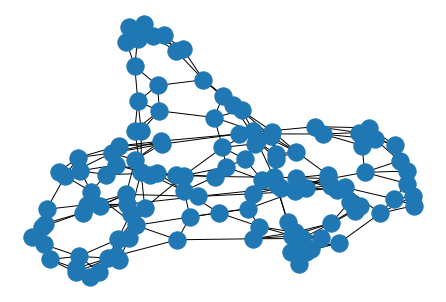

124


In [9]:
C = nx.Graph()

with open("./graph_4.data",'rb') as file:
    stationList = pickle.load(file)
    
C.add_edges_from(stationList)
nx.draw(C)
plt.show()
print(C.number_of_nodes())

In [11]:
with open(f'direct_graph.pkl', 'wb') as f:
    pickle.dump(C, f)

In [16]:
T_data = T_data/T_data.values.max(axis=1,keepdims=True)

In [43]:
T_data.head()

Date,2008-09-24,2008-09-25,2008-09-26,2008-09-27,2008-09-28,2008-09-29,2008-09-30,2008-10-01,2008-10-02,2008-10-03,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Station,,,,,,,,,,,,,,,,,,,,,
APSD Digras Yeotmal,149.587590,127.045562,154.089629,179.460725,149.540561,119.620397,193.382188,230.307546,198.207035,195.132359,...,14.548946,30.833403,24.082148,39.086273,22.487976,22.701942,26.120343,33.922612,34.343054,32.026001
ARS Achalpur Amravathi,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,394.827523,405.511089,397.607973,403.267668,...,443.714308,451.638333,439.210763,455.982789,449.709990,449.384209,439.873972,457.400960,452.307250,447.975097
ARS Buldhana Buldhana,189.053381,199.603463,206.303704,187.551223,190.802319,194.053416,232.995310,234.967502,229.309921,237.013352,...,36.689387,39.227810,37.160240,67.676686,45.351107,49.679748,46.507287,53.808432,50.321455,40.824457
ARS CHAS AHMEDNAGAR,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,...,86.426138,86.926170,86.422612,111.979479,88.171231,95.921145,95.684229,123.034393,100.567476,92.089298
ARS Eakarjuna Warora Chandrapur,845.632165,986.199250,827.098153,855.901896,641.830310,427.758723,424.720218,443.195222,411.679372,399.758284,...,39.609108,43.618347,34.671900,56.363478,36.004751,47.524724,44.475720,55.397049,48.912070,48.397548


In [26]:
T_data.isna()

Date,2008-09-24,2008-09-25,2008-09-26,2008-09-27,2008-09-28,2008-09-29,2008-09-30,2008-10-01,2008-10-02,2008-10-03,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Station,,,,,,,,,,,,,,,,,,,,,
APSD Digras Yeotmal,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ARS Achalpur Amravathi,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ARS Buldhana Buldhana,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ARS CHAS AHMEDNAGAR,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ARS Eakarjuna Warora Chandrapur,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZARC Sindewahi chandrapur,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZARC Waghapur Road Yevatmal,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"ZARS IGATPURI, NASIK",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
T_data.isna().values.sum()

0

In [10]:
C = C.to_directed()

In [46]:
T_data.columns = pd.to_datetime(T_data.columns)

In [47]:
n_lags = 6
start_date = min(T_data.columns) + dt.timedelta(days=n_lags) # first day we can use as response
end_date = max(T_data.columns) # last day of data

print(start_date)
print(end_date)

2008-09-30 00:00:00
2019-12-31 00:00:00


In [48]:
# iterate over days and create graph with lagged node labels for each day
for date in pd.date_range(start_date, end_date):
    # get data in lag period
    start_lag = date - dt.timedelta(days=n_lags)
    lag_dates = T_data.columns[(T_data.columns < date) & (T_data.columns >= start_lag)]
    
#     print(T_data[lag_dates].shape)
    # create feature and response arrays
    rainfall = np.reshape(T_data[lag_dates].values, (-1, n_lags, 1))
    target = np.array((T_data[date].values))
    target = target.reshape(-1, 1)  
    print("############### Lag Dates : #####################################")    
    print(lag_dates)
    print("############### Rainfall : #####################################")    
    print("Rainfall shape:{}".format(rainfall.shape))
#     print(rainfall)
    print("############### Target: #####################################")    
    print("Target shape:{}".format(target.shape))
#     print(target)
# save feature and response arrays with original graph
    with open(f'model_ready_data_4_neighbors/{str(date)[0:10]}.pkl', 'wb') as f:
        pickle.dump((C,rainfall , target), f)

############### Lag Dates : #####################################
DatetimeIndex(['2008-09-24', '2008-09-25', '2008-09-26', '2008-09-27',
               '2008-09-28', '2008-09-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
############### Rainfall : #####################################
Rainfall shape:(124, 6, 1)
############### Target: #####################################
Target shape:(124, 1)
############### Lag Dates : #####################################
DatetimeIndex(['2008-09-25', '2008-09-26', '2008-09-27', '2008-09-28',
               '2008-09-29', '2008-09-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
############### Rainfall : #####################################
Rainfall shape:(124, 6, 1)
############### Target: #####################################
Target shape:(124, 1)
############### Lag Dates : #####################################
DatetimeIndex(['2008-09-26', '2008-09-27', '2008-09-28', '2008-09-29',
               '2008-09-3